In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
def euclidean_distance(x1, x2):
    
    return np.sqrt(np.sum((x2-x1)**2))
np.random.seed(42)
class K_Means:
    
    def __init__(self, k=5, max_iters=100, plot_steps = False):
        
        self.k = k
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.k)]
        self.centroid = []
        
    def predict(self, X):
        
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_sample_idx = np.random.choice(self.n_samples, self.k, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idx]
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
        return self._get_cluster_labels(self.clusters)
    
    def _create_clusters(self, centroids):
        
        clusters = [[] for _ in range(self.k)]
        for idx, e in self.X:
            closest_center_idx = self._closest_centriod(e, centroids)
            clusters[closest_center_idx].append(idx) #we are storing idx_values in clusters... But Why not Value e???
        return clusters
            
    def _closest_centriod(self, point, centroids):
        
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_center = np.argmin(distances)
        return closest_center
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for idx, cluster in enumerate(clusters):
            cluster = np.array(cluster)########changes
            cluster = cluster.astype(int)#######changes
            new_center = np.mean(self.X[cluster], axis = 0)
            centroids[idx] = new_center
        return centroids
    def _is_converged(self, old, new):
        
        distances = [euclidean_distance(old[i], new[i]) for i in range(self.k)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self, clusters):
        
        labels = np.empty(self.n_samples)
        for idx, cluster in enumerate(clusters):
            for e in cluster:
                e = int(e) ###########changes
                labels[e] = idx
        return labels
                
    def plot(self):
        
        fig , ax = plt.subplots(figsize = (12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

In [4]:
X, y = make_blobs(centers = 4, n_samples = 10000, n_features = 2, shuffle = True, random_state = 42)

In [5]:
k = K_Means(k = 4, max_iters = 100, plot_steps = False)

In [6]:
z = k.predict(X)

C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [11]:
print(k.centroid)
print(k.clusters)

[]
[[], [-2.968854395325747, -8.358300787461568, 5.25364969201801, -7.715965727647558, -6.178371551707901, 4.520219933754952, -2.441342112525347, -1.650746506396085, -8.373366111129913, -6.508759398680246, -0.5176443208480161, 4.210898118855682, 4.211560578430346, 4.540564498436069, -8.228194211548075, 4.946918073479924, 6.694393725632861, -3.6054727099479518, -2.1982900574547455, -6.662153708137046, 4.87805014236773, 4.641855680983912, -5.5441532933006155, -6.522959583901423, -10.198295970308285, 2.4315980599998492, 4.525406464429238, -3.092796949398755, -2.2420709720412666, -2.5836310521527963, -9.287613104571818, -8.612011803737532, -6.292825340415615, -9.354387933166358, -3.67931064911211, -1.956897685373227, -2.2817017473206964, 5.5939639383847295, -9.722603792996427, -5.90013968948024, -6.42881485481947, 4.1886600092842246, -7.611937812714091, -4.94801478132918, 4.603298796351256, -2.6793822455776786, -6.94687264136679, 5.731985620210527, -3.123520767149045, -2.7326636054246025, 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

In [12]:
X, y = make_blobs(centers = 4, n_samples = 500, n_features = 2, shuffle = True, random_state = 42)

In [15]:
k1 = KMeans(K = 4, max_iters = 100, plot_steps = True)

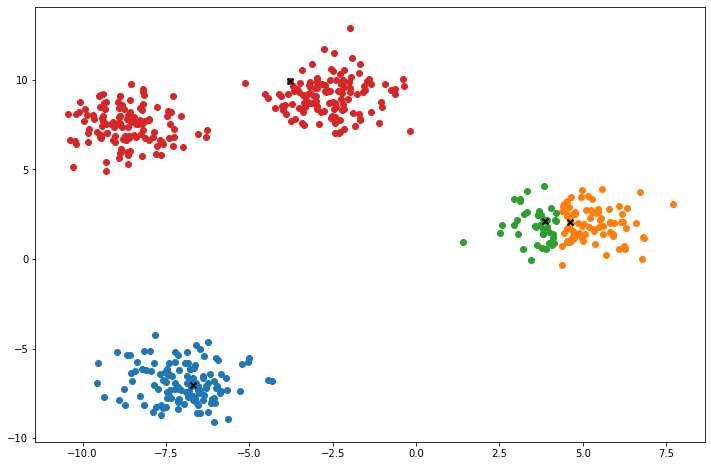

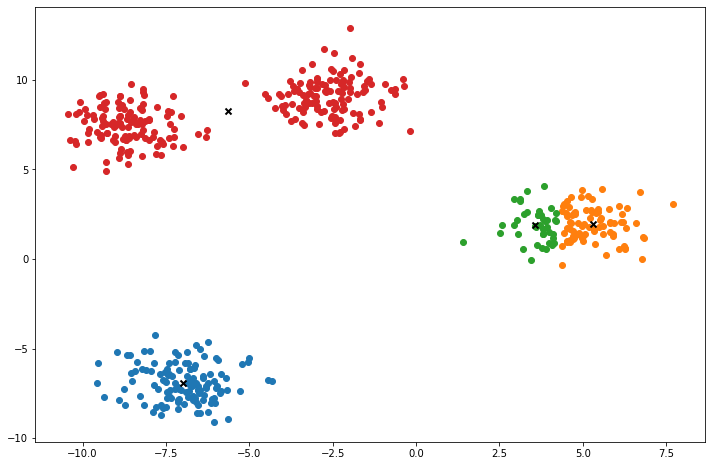

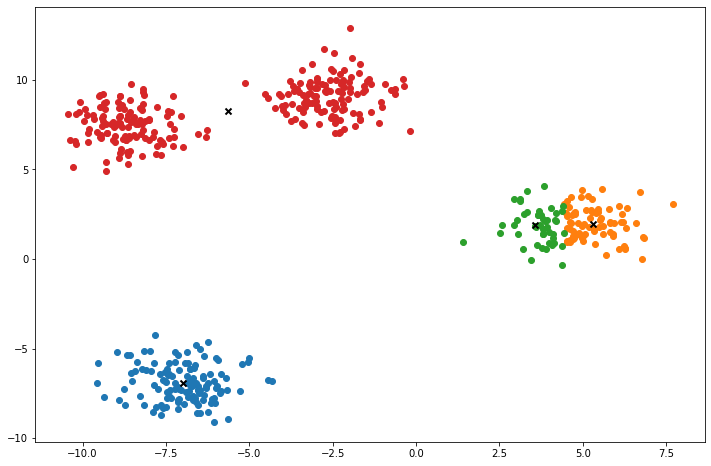

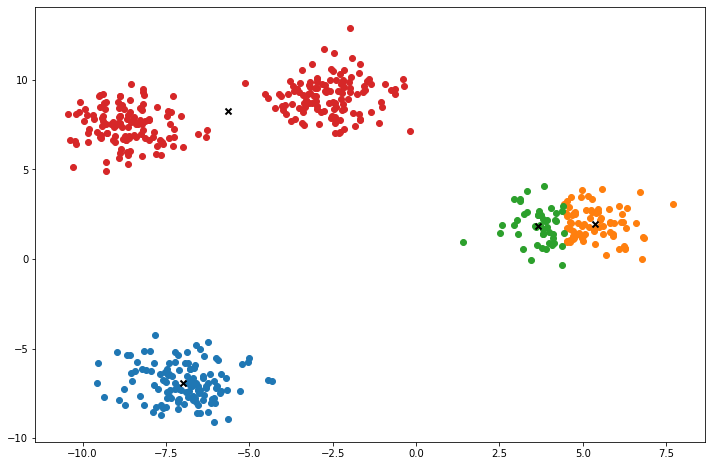

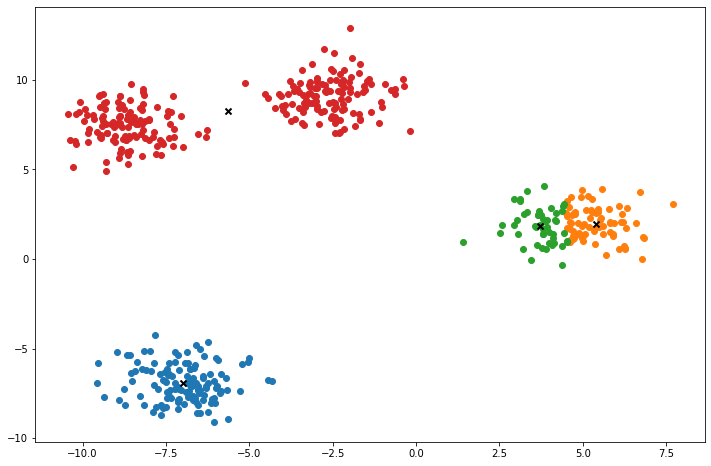

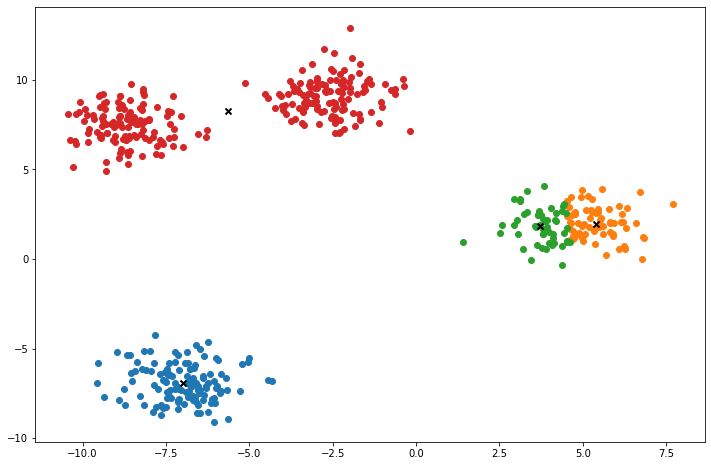

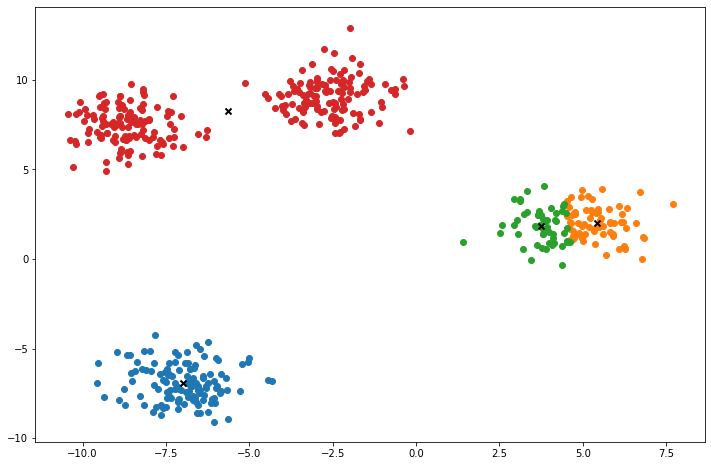

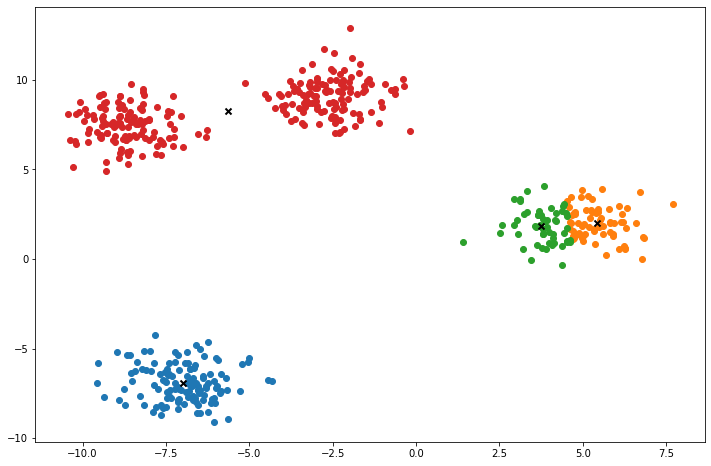

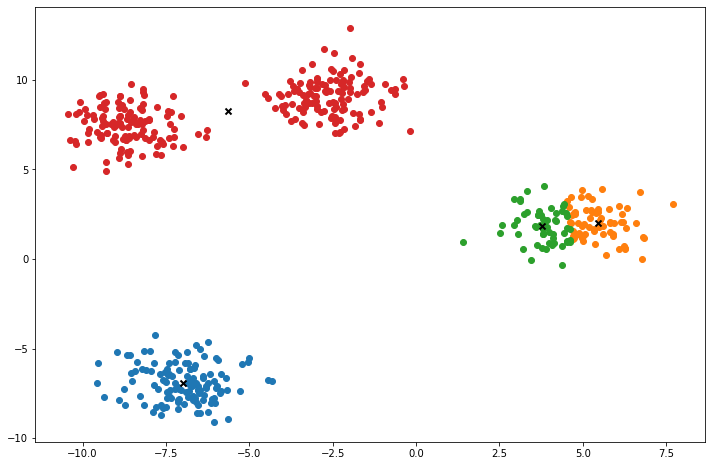

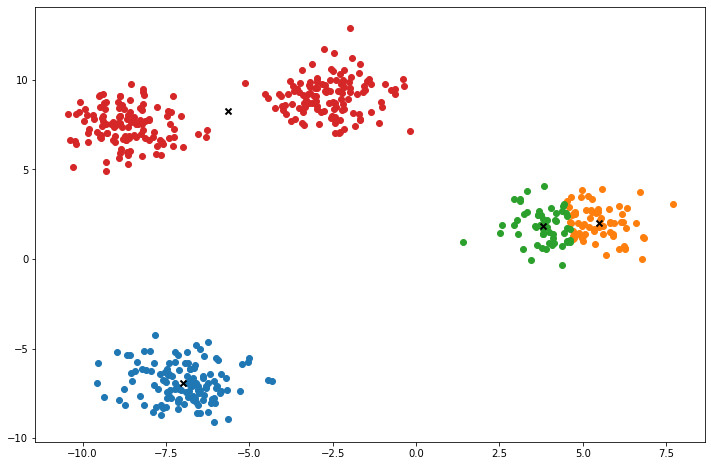

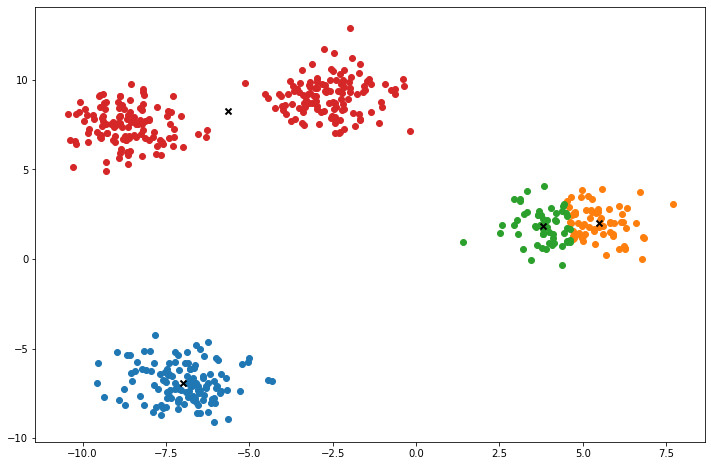

In [16]:
z = k1.predict(X)

In [18]:
print(k1.centroids)
print(k1.clusters)

[[-7.0009649  -6.90445754]
 [ 5.47052868  1.99630231]
 [ 3.79931413  1.83459091]
 [-5.64187646  8.27394357]]
[[1, 4, 5, 7, 9, 14, 25, 26, 30, 34, 35, 40, 48, 50, 53, 58, 62, 65, 66, 69, 71, 72, 77, 80, 82, 91, 93, 110, 115, 118, 119, 122, 127, 128, 133, 140, 144, 150, 151, 158, 159, 164, 167, 170, 177, 178, 179, 189, 190, 193, 195, 199, 202, 206, 211, 215, 227, 228, 230, 233, 235, 237, 241, 249, 258, 264, 265, 269, 279, 284, 289, 290, 298, 300, 306, 307, 310, 315, 326, 344, 346, 349, 350, 352, 355, 358, 362, 363, 366, 371, 373, 380, 383, 385, 387, 389, 394, 395, 402, 406, 408, 409, 410, 413, 423, 426, 431, 432, 433, 435, 445, 446, 447, 453, 454, 455, 457, 462, 468, 477, 479, 485, 493, 497, 498], [2, 12, 15, 22, 41, 45, 47, 54, 68, 70, 78, 81, 94, 101, 102, 121, 125, 131, 134, 142, 162, 163, 187, 208, 219, 238, 239, 246, 268, 272, 277, 282, 286, 293, 299, 302, 303, 305, 309, 312, 313, 314, 317, 319, 321, 334, 339, 351, 360, 365, 372, 377, 400, 405, 412, 418, 420, 436, 441, 443, 449, 456